In [20]:
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [21]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [22]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [23]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [24]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

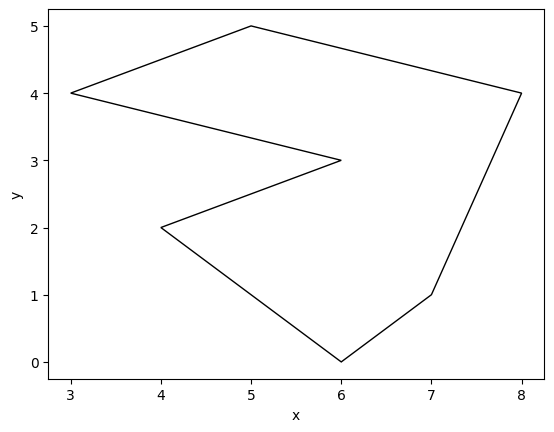

In [25]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [26]:
%matplotlib tk
from matplotlib.backend_bases import MouseButton
'''
Cała ta funkcja umożliwia zadawanie wierzchołków z myszki.
Po uruchomieniu kodu, włączy się okno, na którym należy klikać lewym przyciskiem myszy
w miejsca, w których chcemy, aby były nasze kolejne wierzchołki. Istnieje możliwość zapisania
figury, jeśli klikniemy w lewym dolnym rogu na ikonkę zapisu.
'''
polygon = []

fig, ax = plt.subplots()
ax.set_title('Polygon')
plt.xlim(0, 10)
plt.ylim(0, 10)

def on_click(event):
    if event.button is MouseButton.LEFT:
        x = event.xdata
        y = event.ydata
        polygon.append((x, y))
        ax.plot(*polygon[-1], marker='.', color='blue')
        plt.show()

plt.connect('button_press_event', on_click)
plt.show(block=True)
for x, y in polygon:
    print("x: ", x, " y: ", y)
%matplotlib inline

x:  4.737903225806452  y:  1.222943722943723
x:  2.056451612903226  y:  2.548701298701299
x:  1.5524193548387095  y:  5.714285714285715
x:  5.463709677419354  y:  9.177489177489178
x:  7.661290322580644  y:  6.417748917748918
x:  8.870967741935484  y:  1.3582251082251084


## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [27]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    minPointY = (0, float('inf'))
    minPointIdx = -1
    maxPointY = (0, float('-inf'))
    maxPointIdx = -1
    
    for i in range(n):
        if polygon[i][1]<minPointY[1]:
            minPointY = polygon[i]
            minPointIdx = i
        if polygon[i][1]>maxPointY[1]:
            maxPointY = polygon[i]
            maxPointIdx = i
    
    prevRightChain = minPointIdx
    prevLeftChain = maxPointIdx

    while prevRightChain!=maxPointIdx: #konstrukcja prawego lancucha
        currRightChain = prevRightChain + 1
        if currRightChain==n:
            currRightChain = 0
        if polygon[prevRightChain][1]>polygon[currRightChain][1]:
            return False
        prevRightChain = currRightChain

    while prevLeftChain!=minPointIdx: #konstrukcja lewego lancucha
        currLeftChain = prevLeftChain + 1
        if currLeftChain==n:
            currLeftChain = 0
        if polygon[prevLeftChain][1]<polygon[currLeftChain][1]:
            return False
        prevLeftChain = currLeftChain
    return True

Przeprowadź test poprawności powyższej funkcji.

In [28]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [29]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

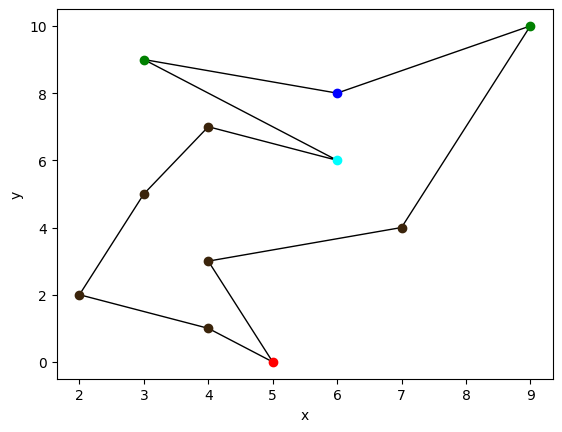

In [30]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [31]:
def det(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    tab = [-1 for _ in range(n)]


    for i in range(n):
        if polygon[(i-1)%n][1]<polygon[i][1] and polygon[(i+1)%n][1]<polygon[i][1]:
            if det(polygon[(i-1)%n], polygon[i], polygon[(i+1)%n])>0:
                tab[i] = 0
            else:
                tab[i] = 3
        elif polygon[(i-1)%n][1]>polygon[i][1] and polygon[(i+1)%n][1]>polygon[i][1]:
            if det(polygon[(i-1)%n], polygon[i], polygon[(i+1)%n])>0:
                tab[i] = 1
            else:
                tab[i] = 2
        else:
            tab[i] = 4

    return tab

Przeprowadź test poprawności powyższej funkcji. 

In [32]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

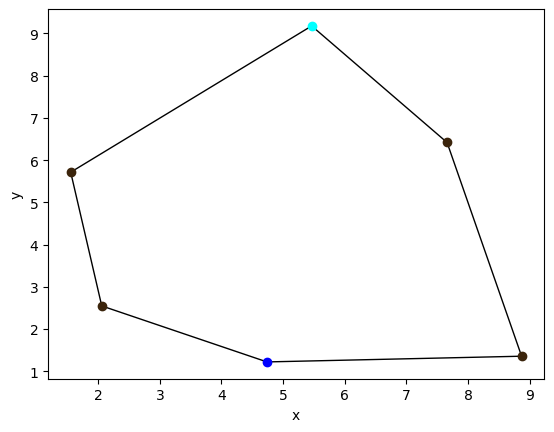

In [33]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

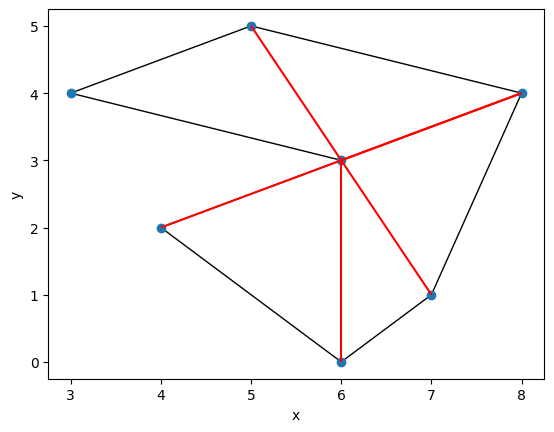

In [34]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [35]:
def min_max(polygon):
    minPointY = (0, float('inf'))
    minPointIdx = -1
    maxPointY = (0, float('-inf'))
    maxPointIdx = -1
    
    for i in range(len(polygon)):
        if polygon[i][1]<minPointY[1]:
            minPointY = polygon[i]
            minPointIdx = i
        if polygon[i][1]>maxPointY[1]:
            maxPointY = polygon[i]
            maxPointIdx = i
    return minPointIdx, maxPointIdx

def not_neighbour(vert1, vert2, n):
    d = abs((vert1[2])%n-(vert2[2])%n)
    return not (d==1 or d==n-1)

def triangle_in_polygon(a, b, c, chain):
    if chain==1:
        return det(a, b, c)>0
    else:
        return det(a, b, c)<0



def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    n = len(polygon)
    print(polygon)
    def draw_triangle():
        vis = Visualizer()
        vis.add_grid()
        vis.add_point(polygon, color='blue')
        for i in range(len(stack)):
            vis.add_point(stack[i][0], color='green')
        for i in range(1, n): #obwód
            p1 = polygon[i]
            p2 = polygon[i-1]
            vis.add_line_segment((p1, p2), color='blue')
        vis.add_line_segment((polygon[0],polygon[len(polygon)-1]), color='blue')

        for p1, p2 in diagonals: #trójkąty
            point1_in_polygon = polygon[p1]
            point2_in_polygon = polygon[p2]
            vis.add_line_segment((point1_in_polygon, point2_in_polygon), color='red')
        vis.show()

    minPointIdx, maxPointIdx = min_max(polygon)
    points = []
    i = minPointIdx
    j = maxPointIdx
    while i!=maxPointIdx: #konstrukcja prawego lancucha, dolny punkt w prawym lancuchu
        points.append((polygon[i], 0, i))
        i += 1
        if i==n:
            i = 0
    while j!=minPointIdx: #konstrukcja lewego lancucha, gorny punkt w lewym lancuchu
        points.append((polygon[j], 1, j))
        j += 1
        if j==n:
            j = 0

    sorted_points = sorted(points, key=lambda x: x[0][1], reverse=True)
    stack = [sorted_points[0], sorted_points[1]]
    diagonals = []
    draw_triangle()
    for i in range(2, n):
        if sorted_points[i][1]!=stack[-1][1]:
            while stack:
                vert = stack.pop()
                if not_neighbour(sorted_points[i], vert, n):
                    diagonals.append([sorted_points[i][2], vert[2]])
                    draw_triangle()
            stack.append(sorted_points[i-1])
            stack.append(sorted_points[i])
        else:
            vert = stack.pop()
            while stack and triangle_in_polygon(sorted_points[i][0], stack[-1][0], vert[0], sorted_points[i][1]):
                if not_neighbour(sorted_points[i], stack[-1], n):
                    diagonals.append([sorted_points[i][2], stack[-1][2]])
                    draw_triangle()
                vert = stack.pop()
            stack.append(vert)
            stack.append(sorted_points[i])
    return diagonals



Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


Lab 3, task 3:
	Test 1: [(0.030693547033494514, -0.0404187105216232), (0.008516127678655797, 0.0360825149685729), (0.0003104825173654846, 0.014850897321514067), (-0.01410484006327968, -0.0016625830706427924), (-0.03384274328908614, -0.01446895561966241), (-0.04493145296650549, -0.0188500830706428)]
Passed
	Test 2: [(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (-0.042159275547150654, 0.0038362932205200373), (-0.02641330780521517, -0.029190667563793703), (0.0006431438076880541, -0.046041157759872144), (0.027477821227042898, -0.029527677367715277), (0.03235685348510742, 0.001140214789147484), (0.028586692194784838, 0.02911202851463769)]
Passed
	Test 3: [(0.002417337356075161, 0.04811376394010061), (-0.006453630385860332, 0.03126327374402216), (-0.024417340063279683, 0.021152979626375107), (-0.006675404579408711, 0.009020626685198624), (-0.034175404579408715, -0.0024377066481347104), (-0.006231856192311938, -0.013559030177546477), (-0.04592943

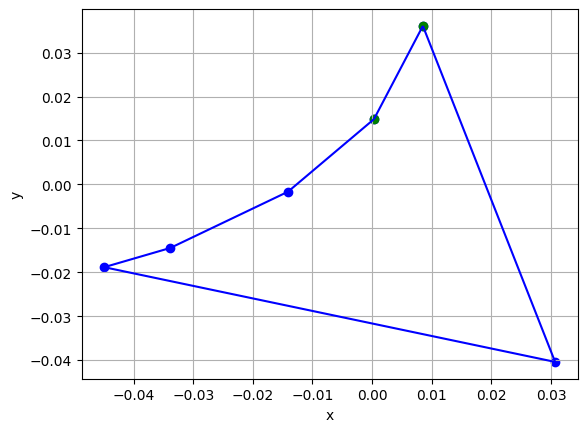

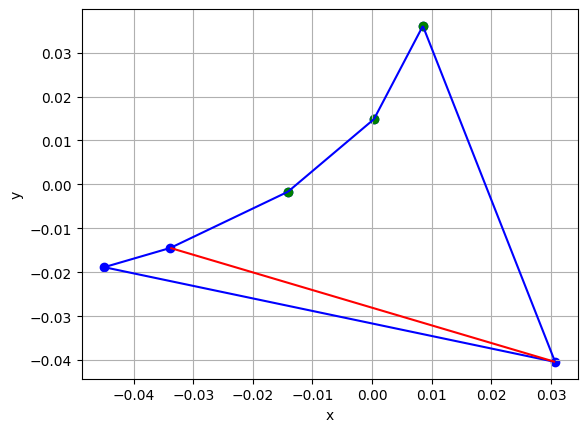

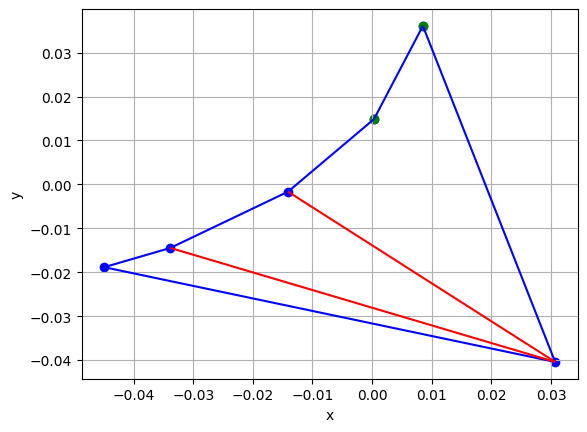

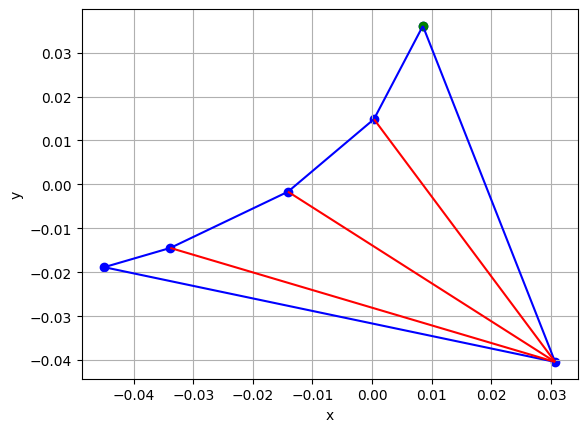

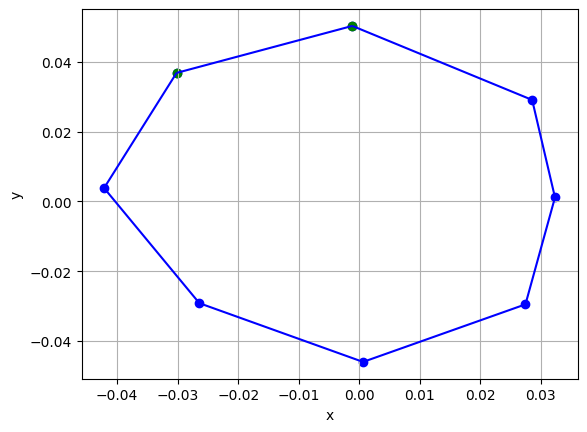

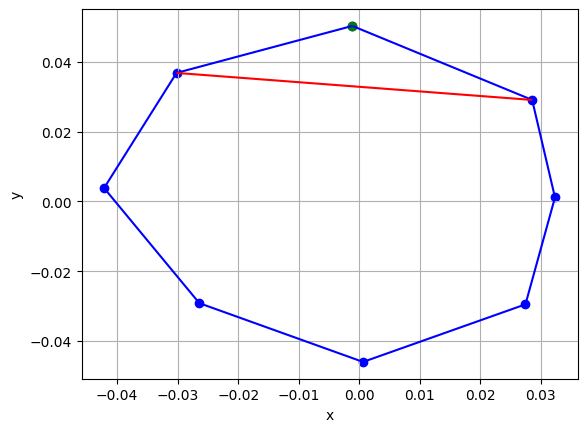

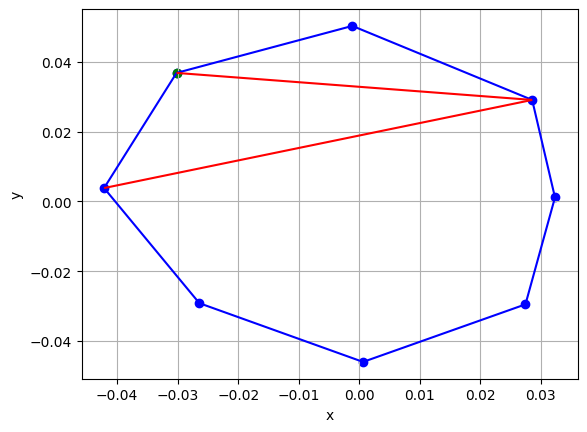

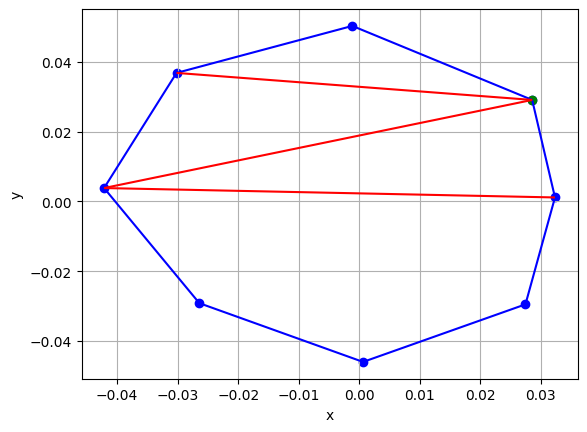

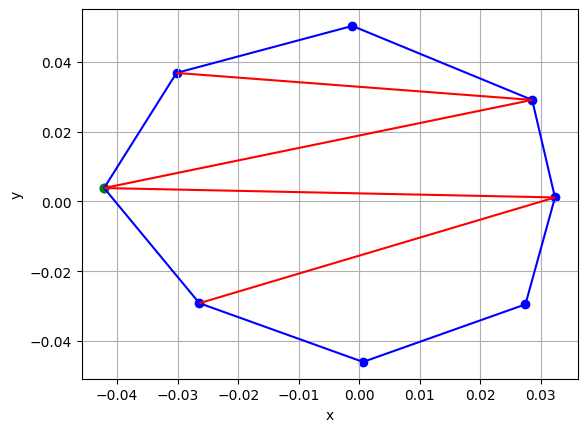

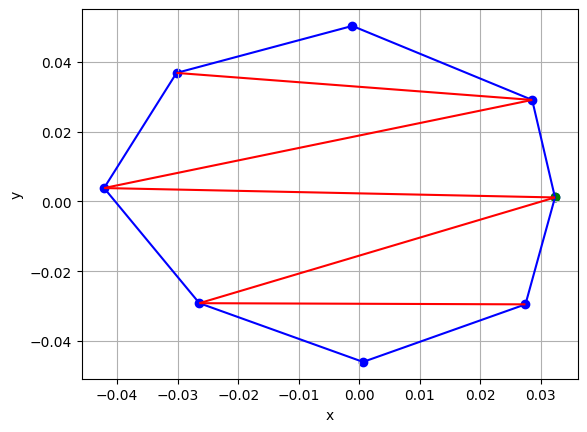

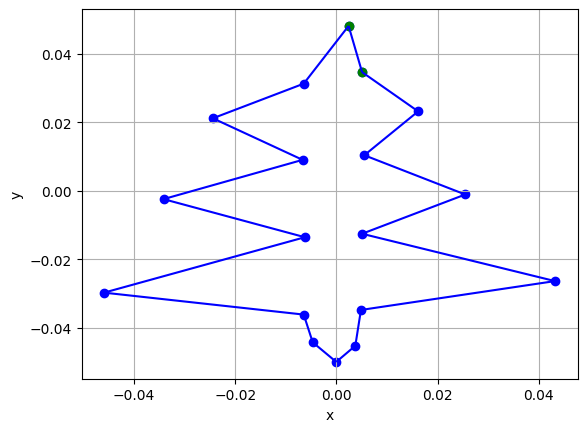

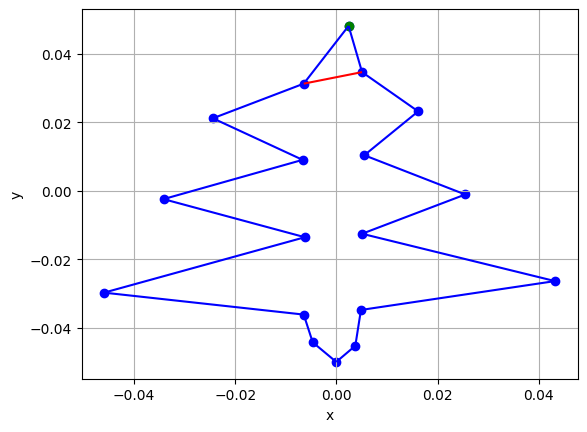

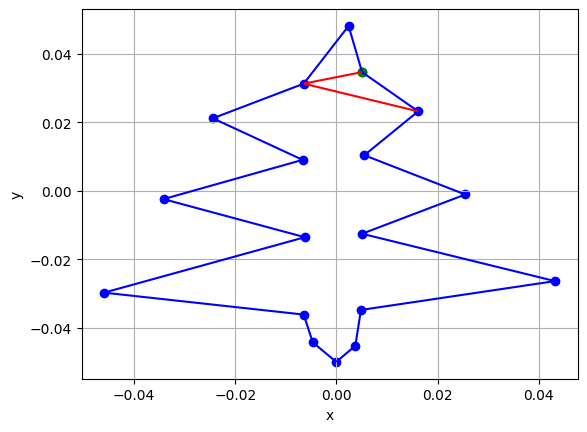

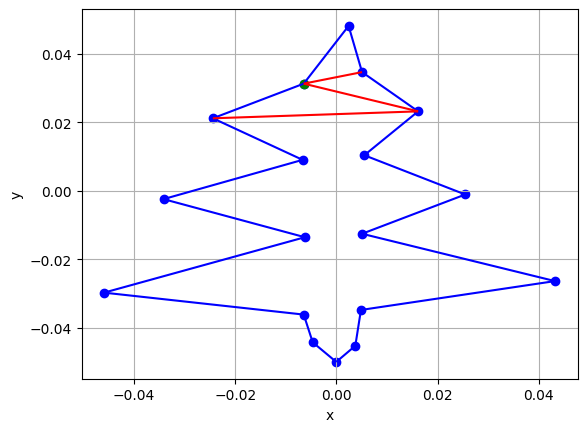

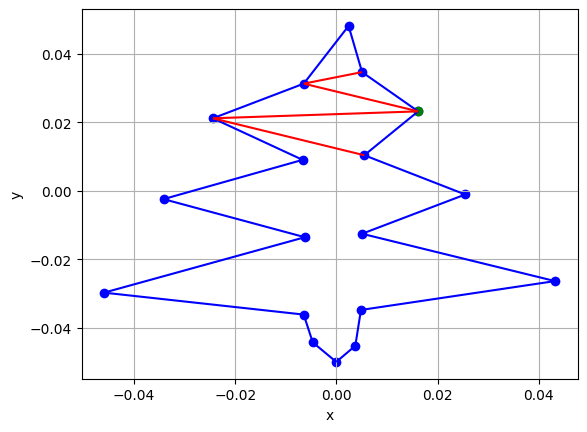

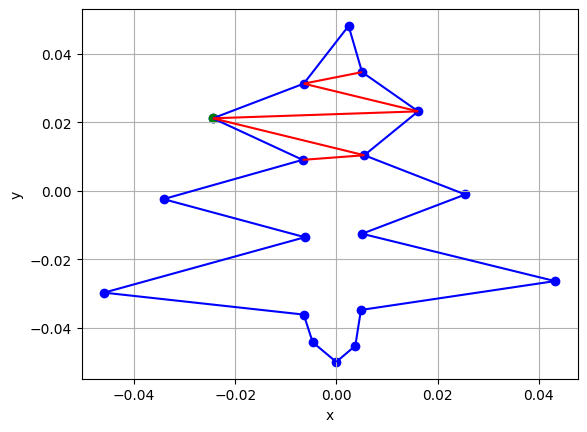

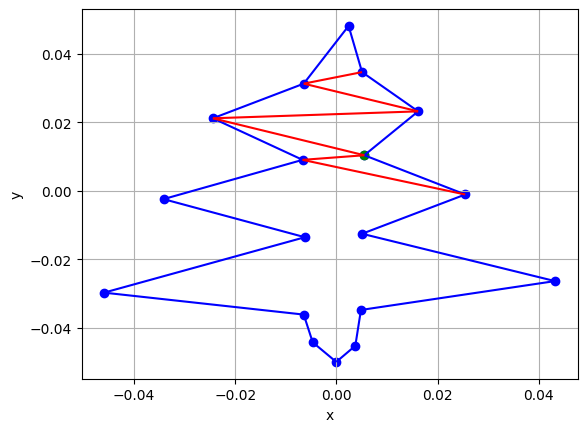

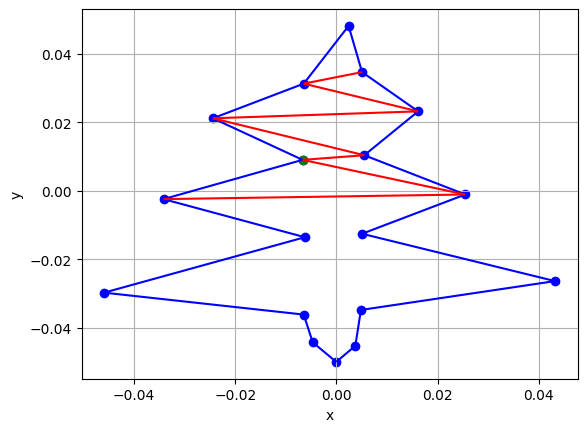

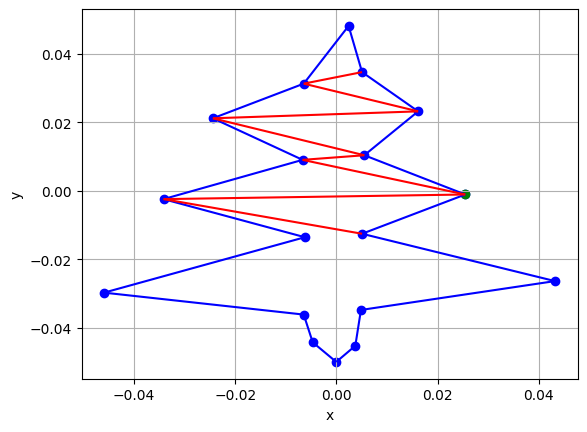

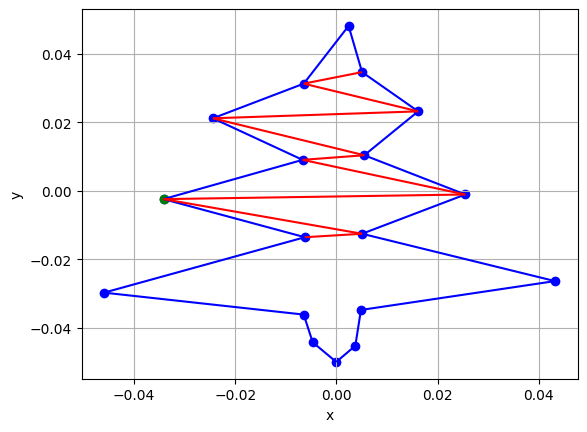

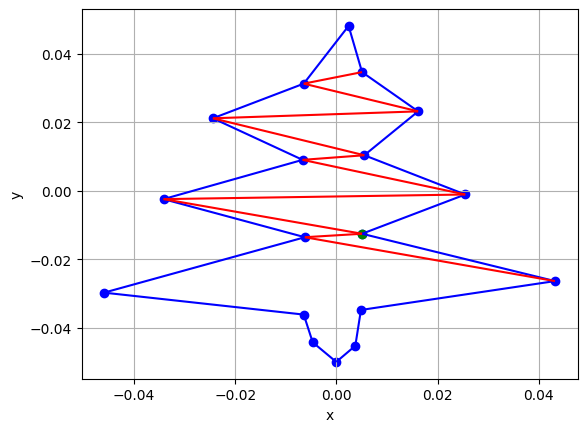

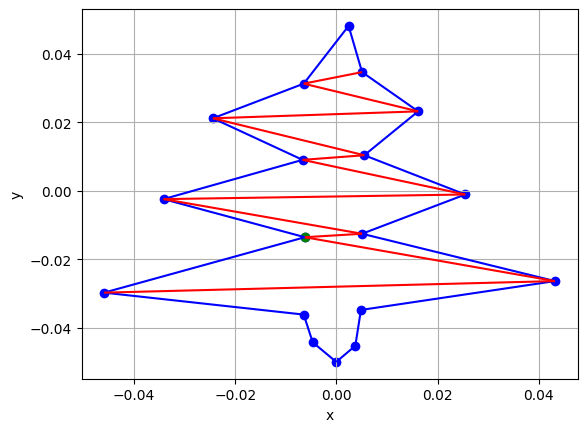

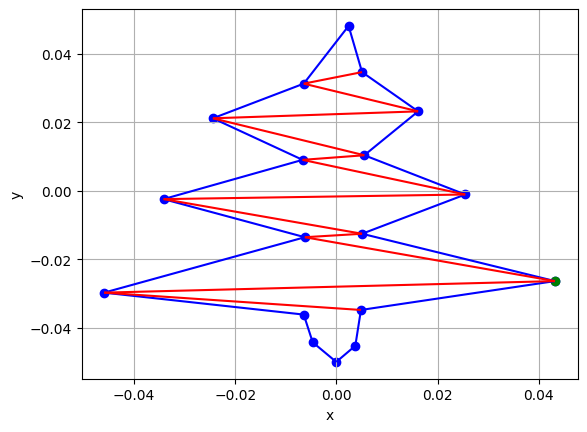

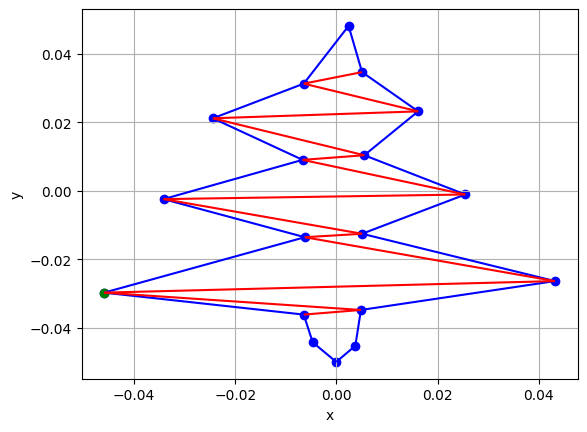

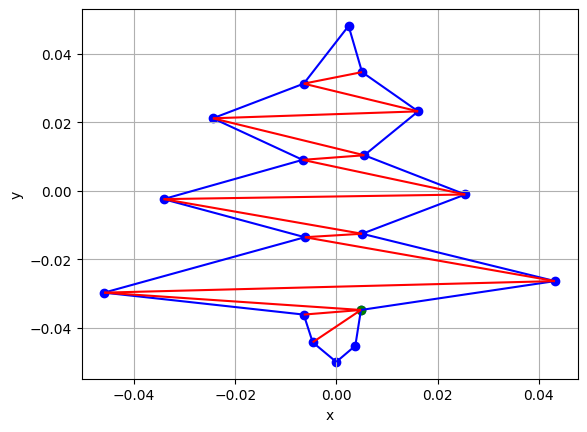

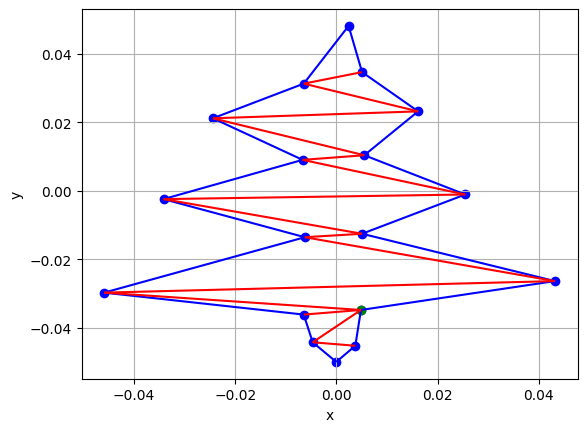

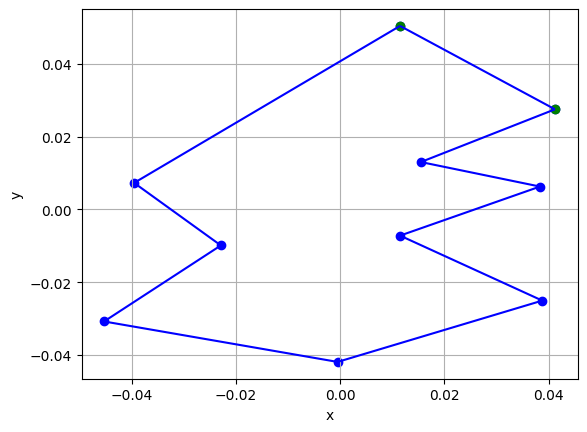

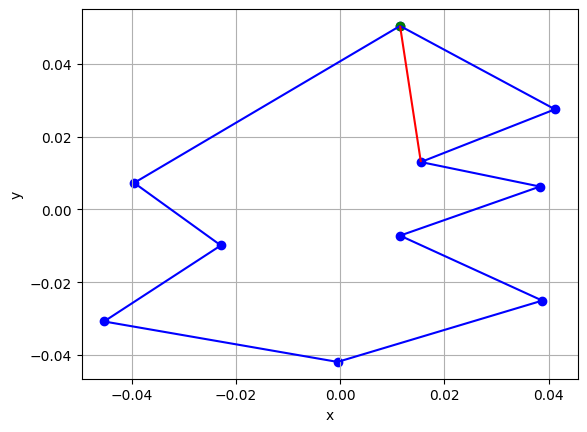

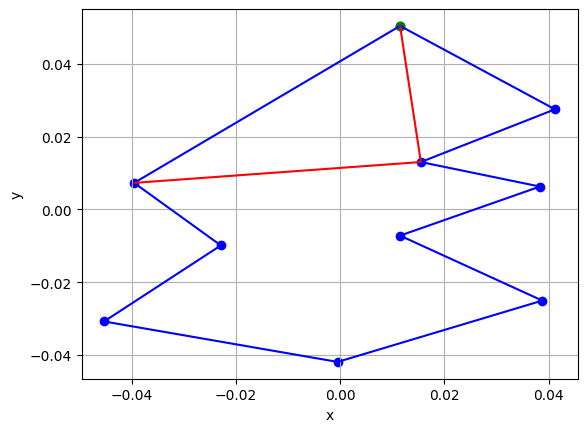

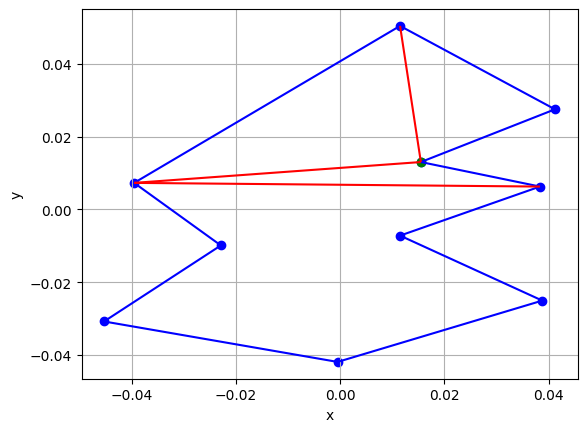

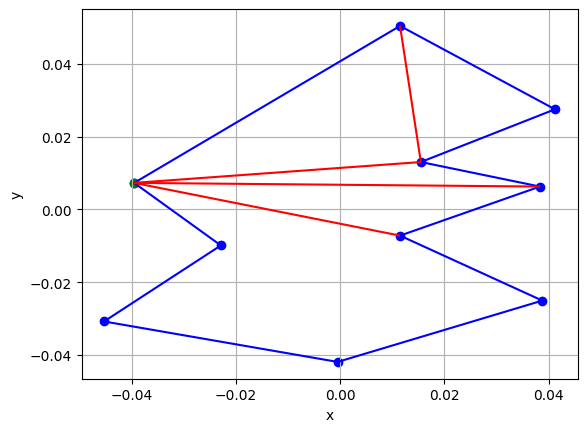

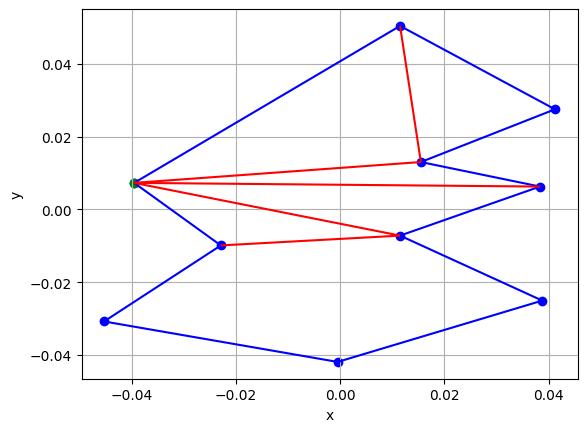

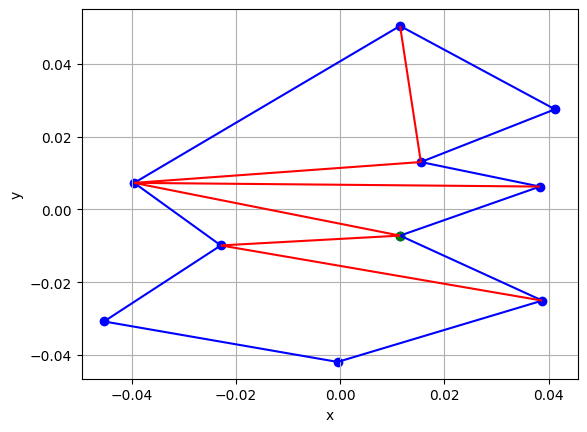

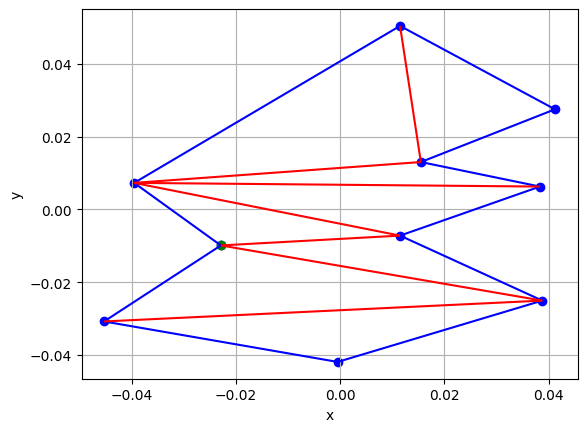

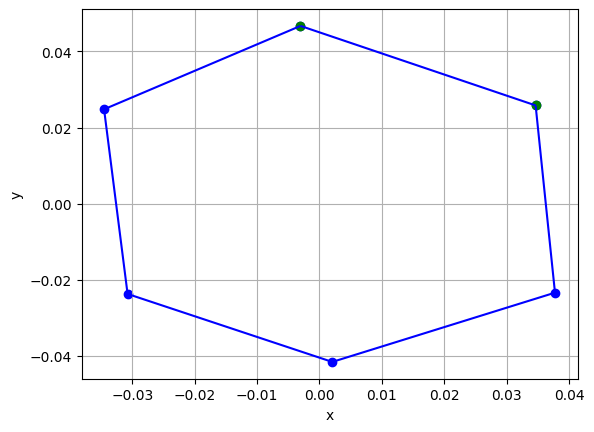

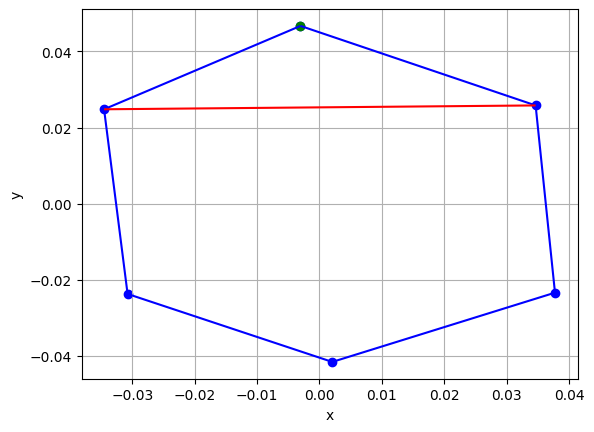

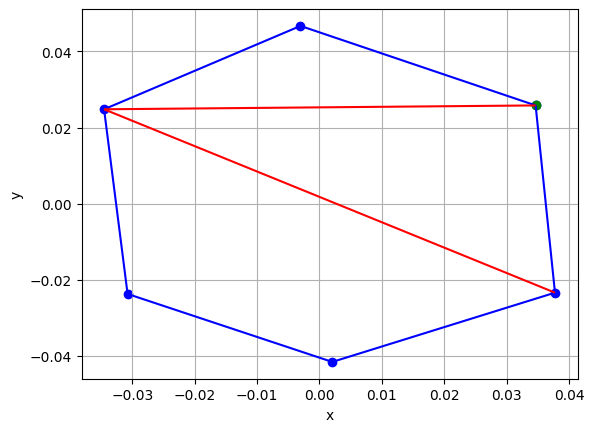

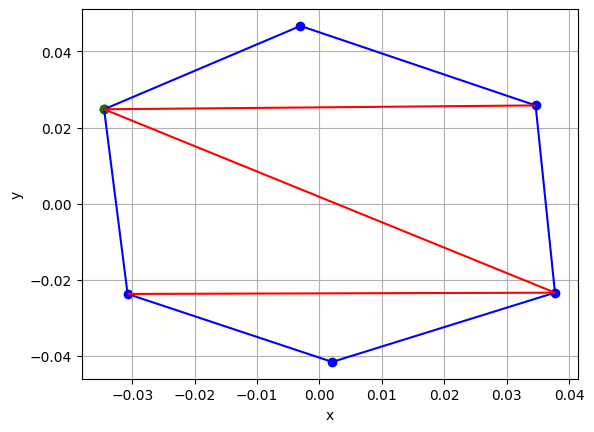

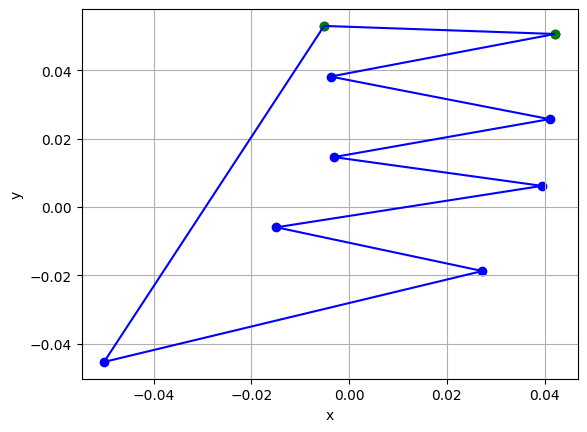

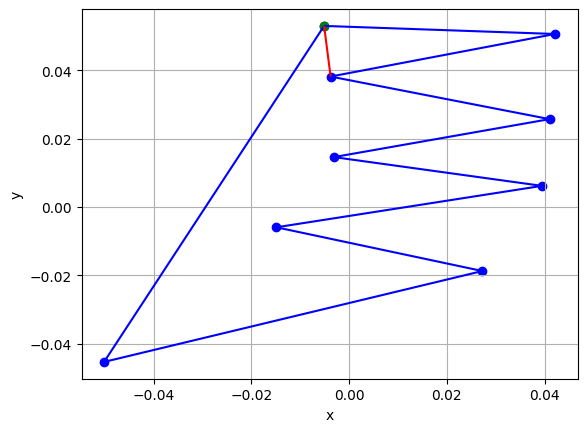

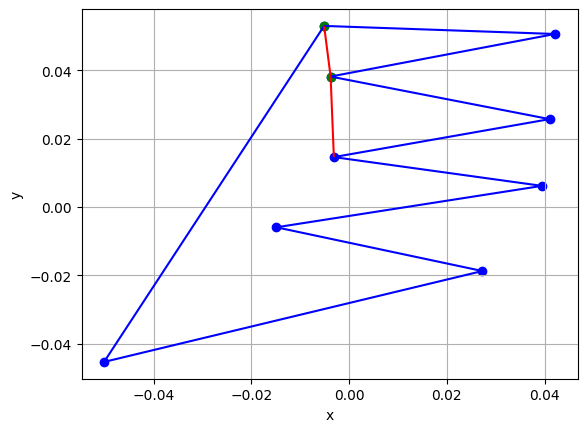

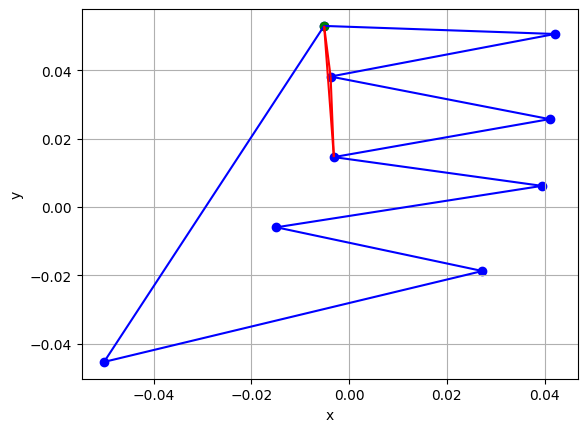

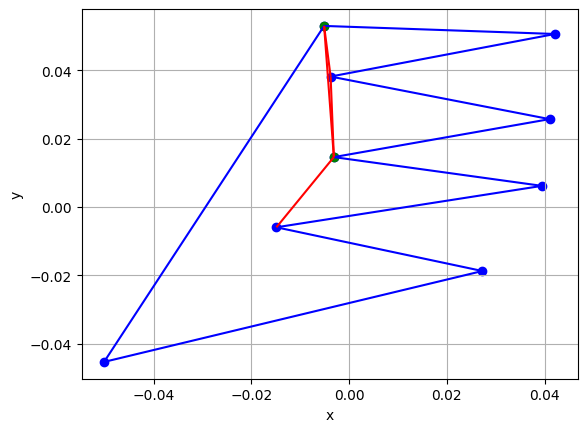

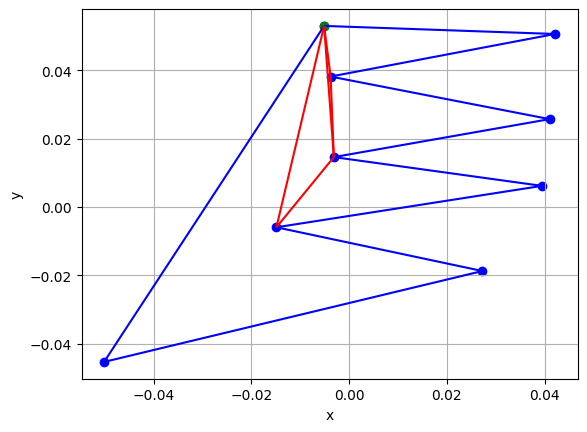

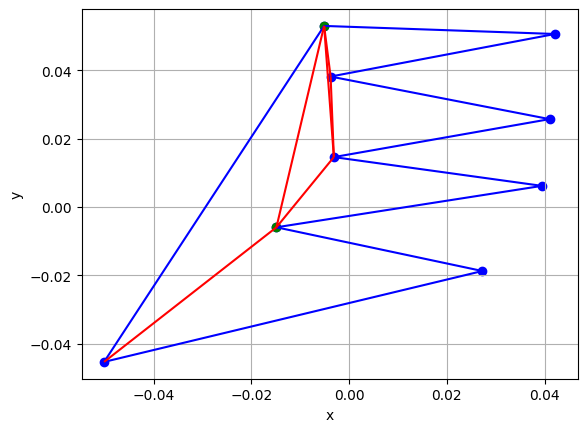

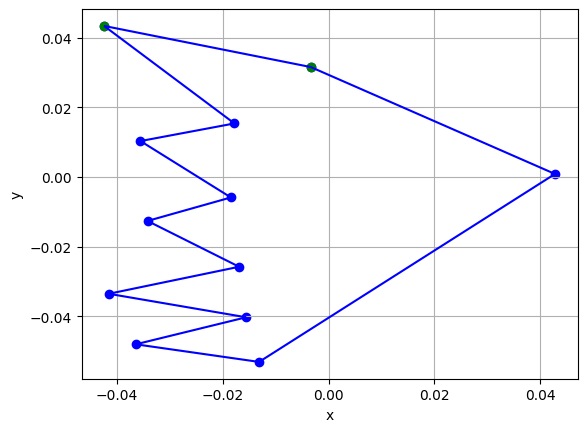

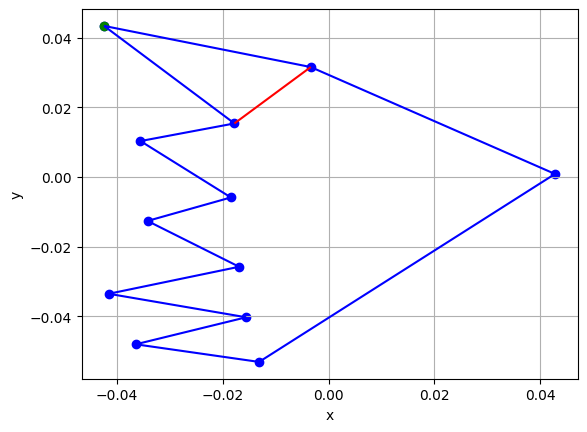

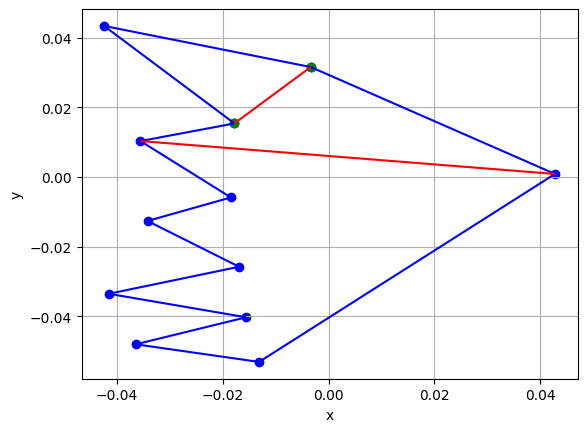

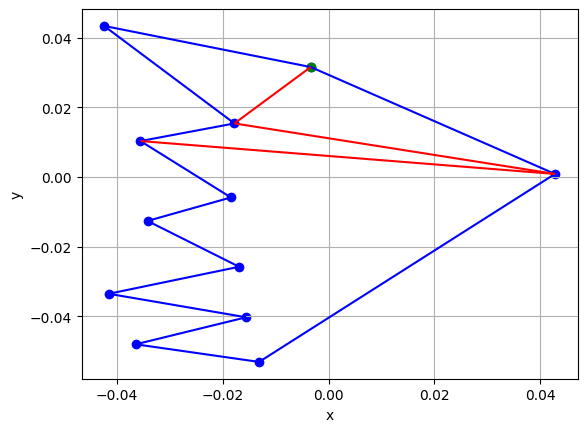

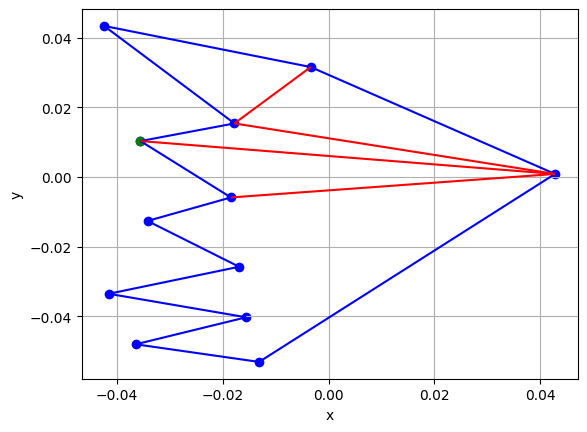

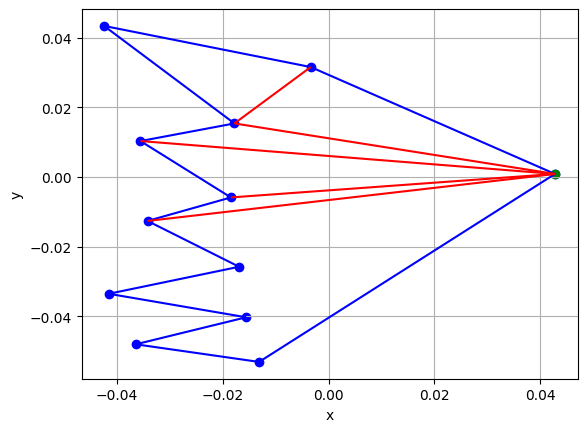

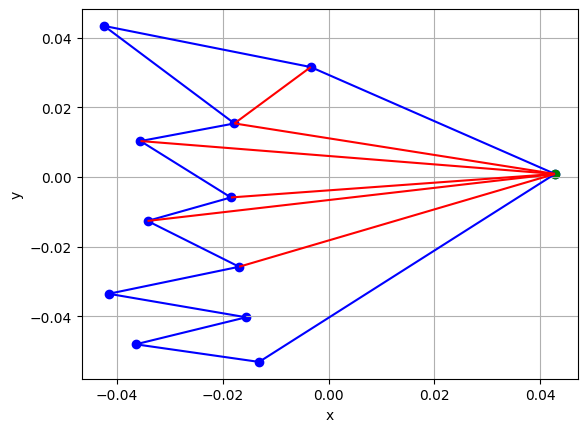

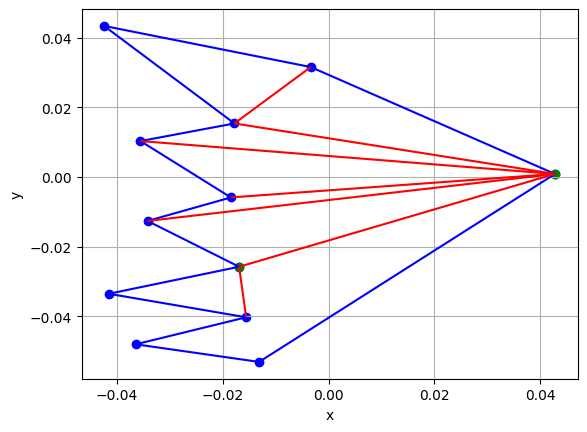

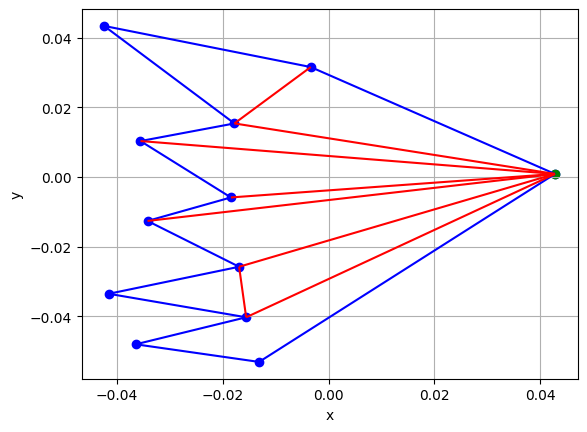

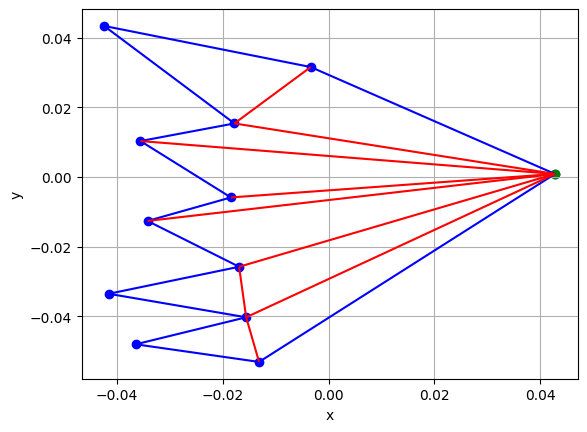

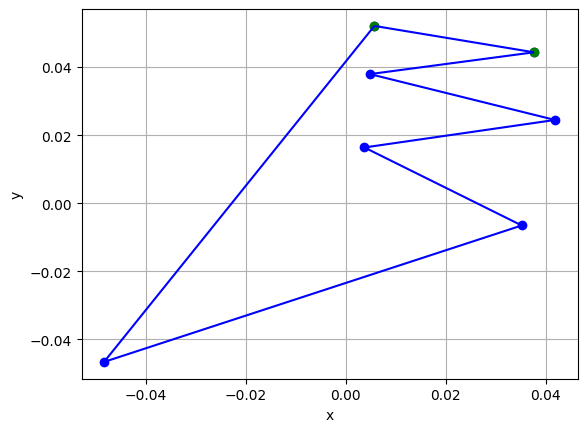

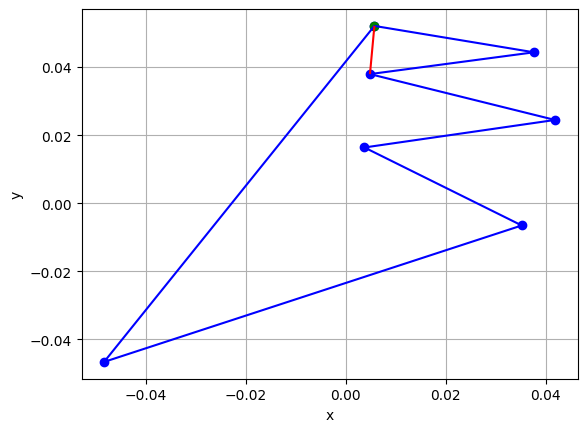

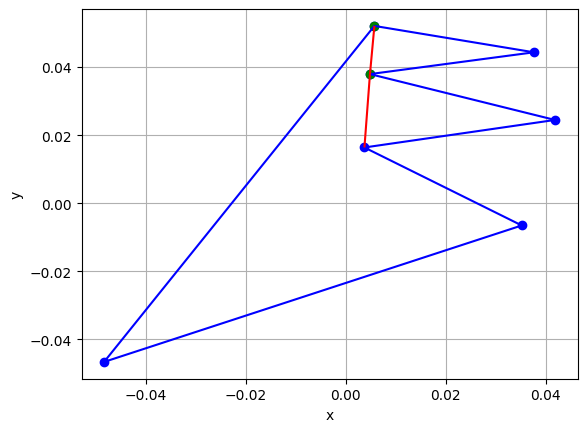

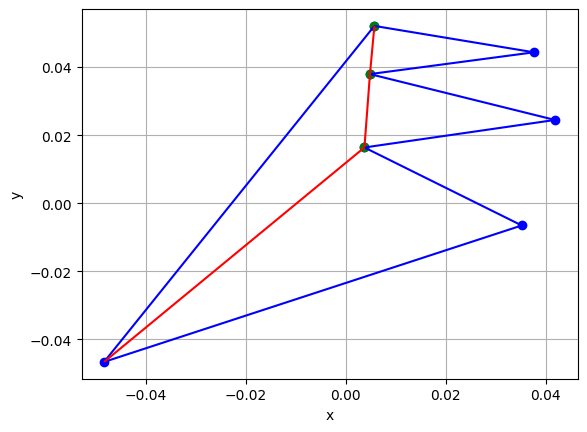

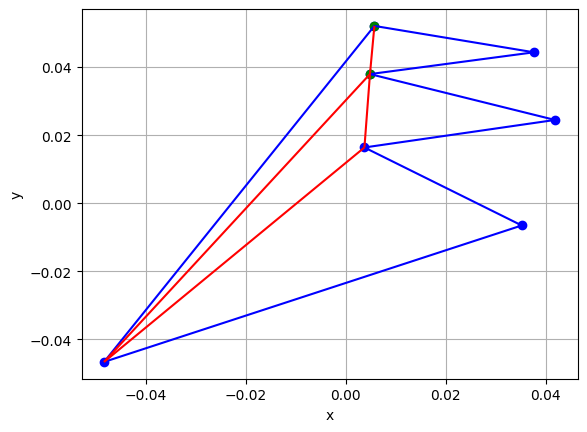

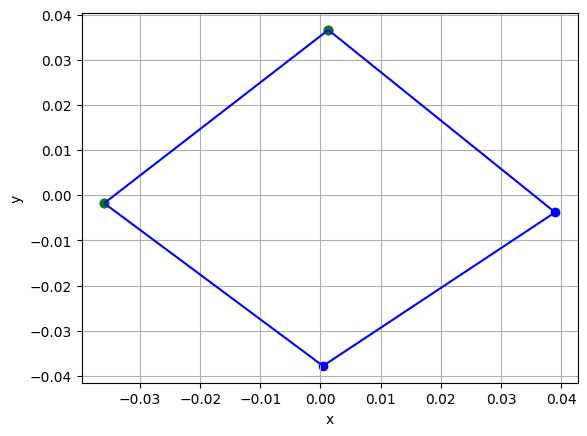

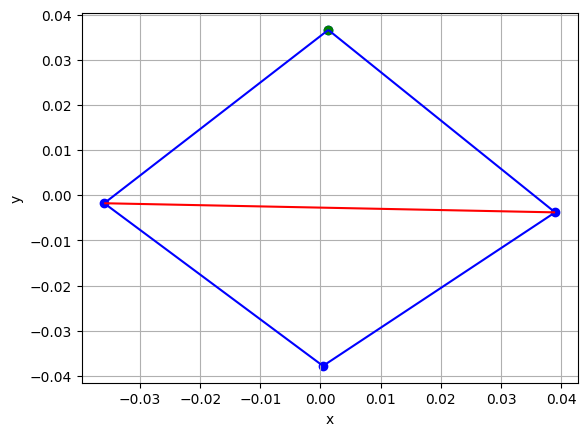

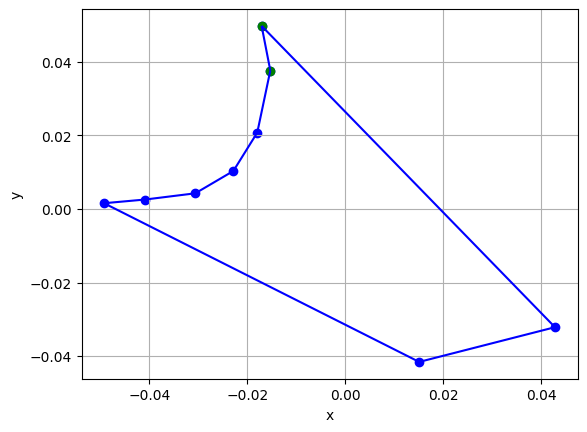

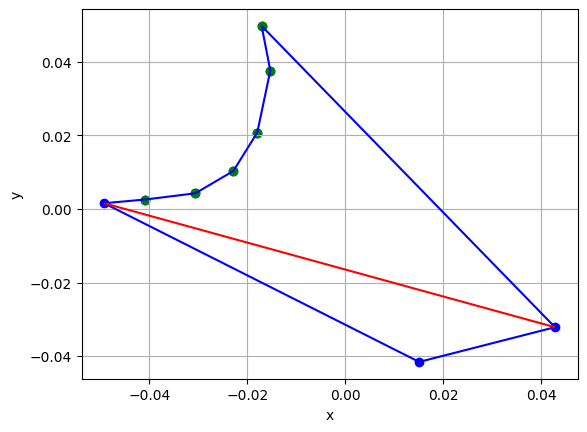

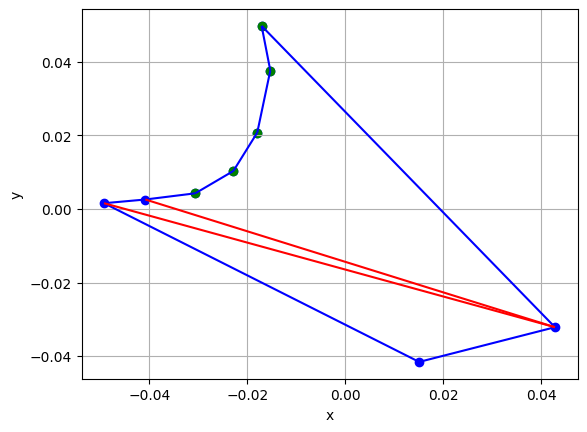

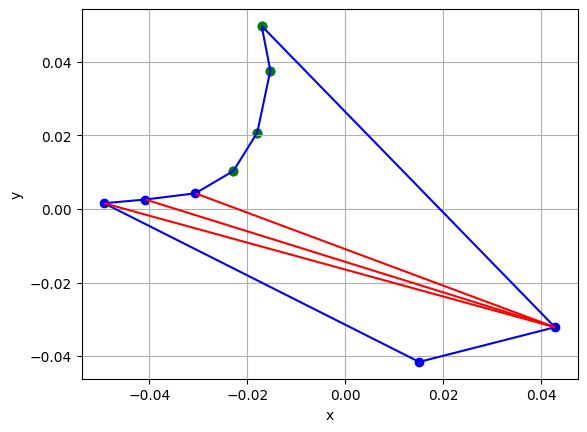

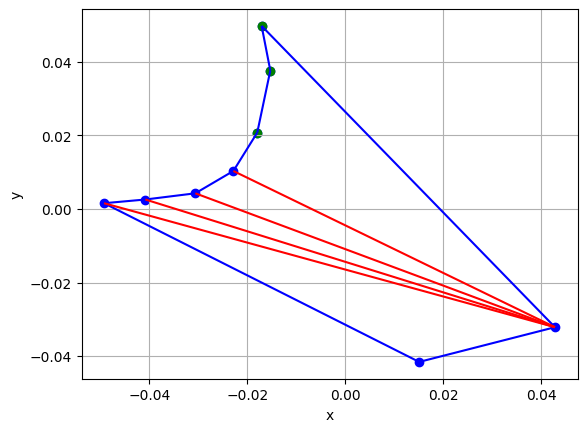

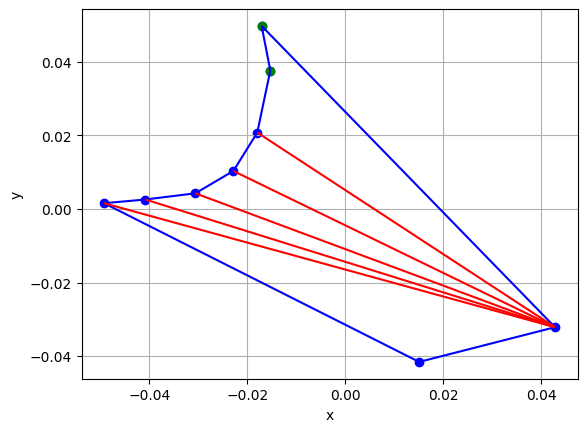

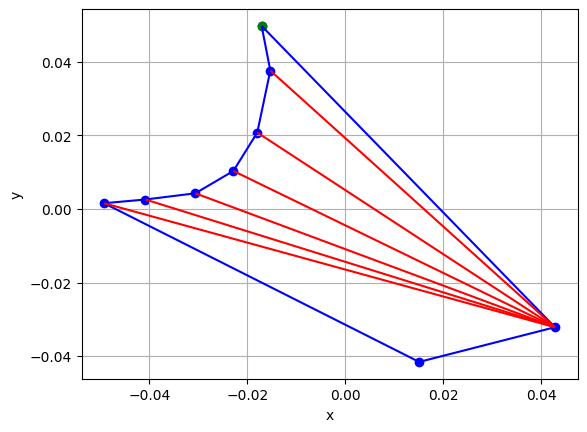

In [36]:
Test().runtest(3, triangulation)

Zwizualizuj powstały wielokąt podzielony na trójkąty.

[(4.737903225806452, 1.222943722943723), (2.056451612903226, 2.548701298701299), (1.5524193548387095, 5.714285714285715), (5.463709677419354, 9.177489177489178), (7.661290322580644, 6.417748917748918), (8.870967741935484, 1.3582251082251084)]


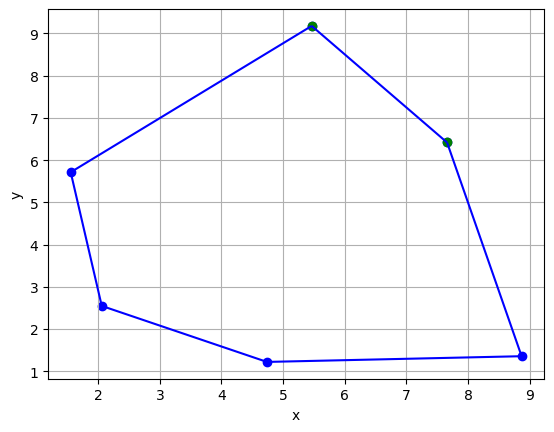

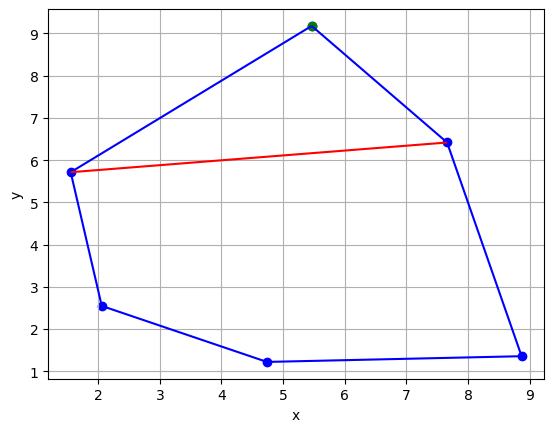

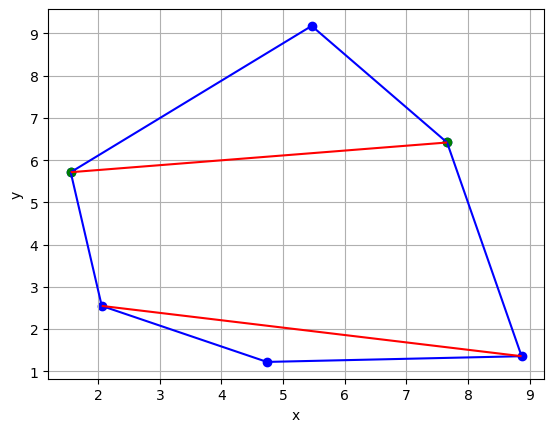

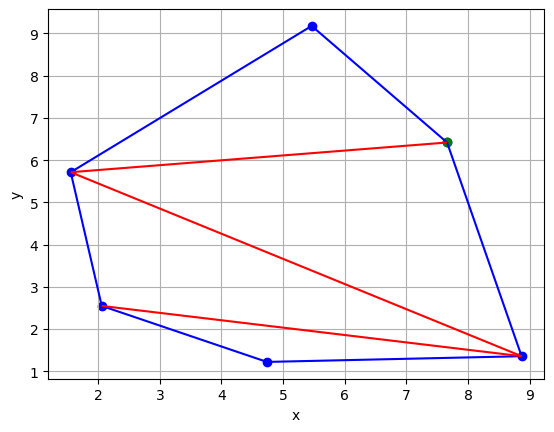

In [37]:
tri = triangulation(polygon)
#draw_polygon_tri(polygon,tri)